# Skeleton test
author: Pranathi
date: 2015.11.30

converting a 3D/2D skeleton to a graph using networkx.
Goal : 
To change this graph to a graph without unnecessary cliques
Count number of branches


In [85]:
import datetime
print("------------------------------------=======================\n| This notebook was last updated on:  ", end="")
print("%s\n------------------------------------=======================\n" % datetime.datetime.now().strftime("%Y-%m-%d, %H:%M:%S"))

------------------------------------=======================
| This notebook was last updated on:  2016-02-28, 11:27:51
------------------------------------=======================



In [86]:
# do the basic setup for the workspace
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir(os.path.join(os.path.expanduser("~"), '3scan-skeleton'))
print(os.getcwd())
import time
import itertools
import networkx as nx
from skimage.morphology import skeletonize as getSkeletonize2D

from skeleton.networkxGraphFromarray import getNetworkxGraphFromarray
from tests.tests3DSkeletonize import getDonut

from matplotlib.pyplot import imshow
from skeleton.cliqueRemovig import removeCliqueEdges
from skeleton.BifurcatedsegmentLengths import getBifurcatedSegmentsAndLengths

/home/pranathi/3scan-skeleton


In [97]:
getBifurcatedSegmentsAndLengths??

In [87]:
##### create small skeleton a cycle with 2 protrusions
frame = np.zeros((10, 10), dtype=np.uint8)

frame[2:-2, 2:-2] = 1
frame[4:-4, 4:-4] = 0
frame=getSkeletonize2D(frame)
frame[1, 5] =1; frame[7, 5] = 1;
sampleImage = np.zeros((3, 10, 10), dtype=np.uint8)
sampleImage[1] = frame


time taken to obtain networkxGraph is 0.001 seconds
number of graphs in the input networkxGraph is 1
number of graphs in the output networkxGraph after cliques are removed is 1
time taken to remove cliques is 0.00 seconds
graph changed to remove cliques


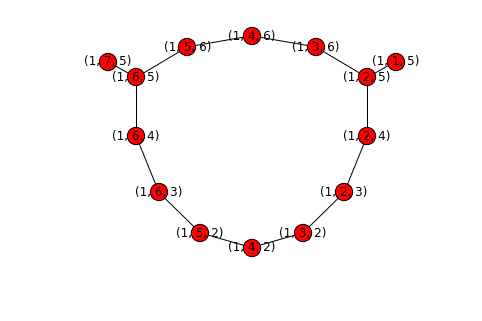

In [88]:
# sample line with no cycles 
# expected number of branches = 1
# expected number of cycles = 0
# expected number of disjointgraphs = 1
sampleLine = np.zeros((5, 5, 5), dtype=np.uint8)
sampleLine[1, :, 4] = 1
sampleGraph = getNetworkxGraphFromarray(sampleImage, True)
sampleGraph=removeCliqueEdges(sampleGraph)
nx.draw_spectral(sampleGraph, with_labels=True)

time taken to obtain networkxGraph is 0.020 seconds
number of graphs in the input networkxGraph is 1


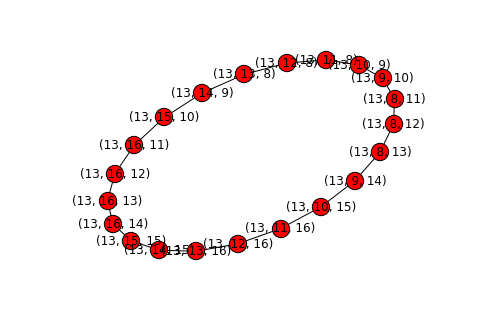

In [89]:
# sample donut which is skeletonized to a ring having a single cycle
# expected number of branches = 1
# expected number of cycles = 1
# expected number of disjointgraphs = 1
donut = getDonut()
donutGraph = getNetworkxGraphFromarray(donut, False)
donutGraph=removeCliqueEdges(donutGraph)
nx.draw_spectral(donutGraph, with_labels=True)

time taken to obtain networkxGraph is 0.000 seconds


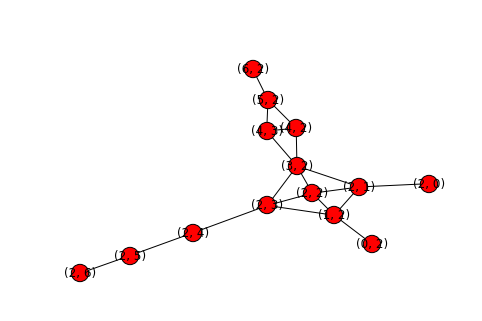

In [90]:
cros = np.zeros((7, 7), dtype=np.uint8)
cros[:,2] = 1
cros[2, :] = 1
cros[4, 3] = 1
crosGraph = getNetworkxGraphFromarray(cros, True)
nx.draw(crosGraph, with_labels = True)

number of graphs in the input networkxGraph is 1
number of graphs in the output networkxGraph after cliques are removed is 1
time taken to remove cliques is 0.00 seconds
graph changed to remove cliques


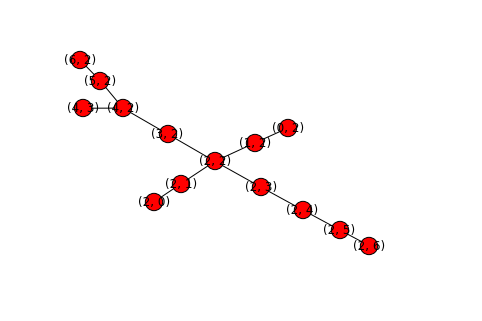

In [91]:
crosGraph = removeCliqueEdges(crosGraph)
nx.draw(crosGraph, with_labels = True)

time taken to obtain networkxGraph is 0.002 seconds


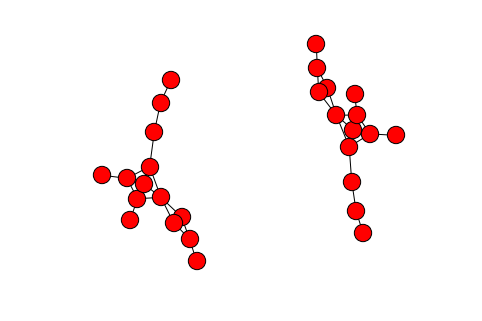

In [92]:
crosPair = np.zeros((14,14,14),dtype=np.uint8)
cros = np.zeros((7, 7), dtype=np.uint8)
cros[:, 2] = 1
cros[2, :] = 1
cros[4, 3] = 1
crosPair[0, 0:7, 0:7] = cros
crosPair[7, 7:14, 7:14] = cros
crosPairgraph = getNetworkxGraphFromarray(crosPair, True)
nx.draw(crosPairgraph)

number of graphs in the input networkxGraph is 2
number of graphs in the output networkxGraph after cliques are removed is 2
time taken to remove cliques is 0.00 seconds
graph changed to remove cliques


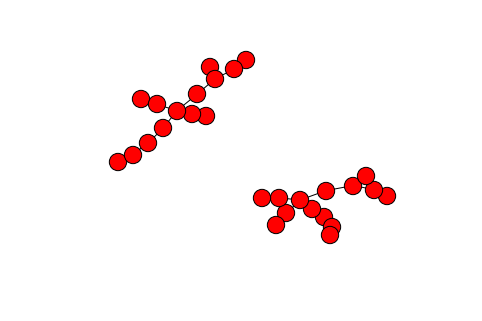

In [93]:
crosPairgraph=removeCliqueEdges(crosPairgraph)
nx.draw(crosPairgraph)

time taken to obtain networkxGraph is 0.003 seconds
number of graphs in the input networkxGraph is 1
number of graphs in the output networkxGraph after cliques are removed is 1
time taken to remove cliques is 0.00 seconds
graph changed to remove cliques


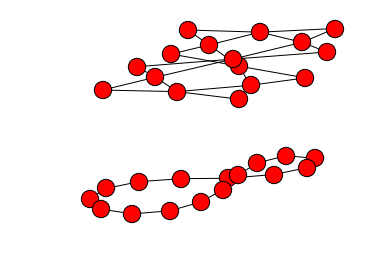

In [94]:
hillbert = np.array([[[1, 1, 1],
                      [1, 0, 1],
                      [1, 0, 1]],
                     [[0, 0, 0],
                      [0, 0, 0],
                      [1, 0, 1]],
                     [[1, 1, 1],
                      [1, 0, 1],
                      [1, 0, 1]]], dtype=bool)
loopGraph = getNetworkxGraphFromarray(hillbert, True)
plt.subplot(2,1,1)
nx.draw(loopGraph)
loopGraph=removeCliqueEdges(loopGraph)
plt.subplot(2,1,2)
nx.draw(loopGraph)

there are no crowded joint points in the image
time taken to obtain networkxGraph is 0.002 seconds
number of graphs in the input networkxGraph is 2


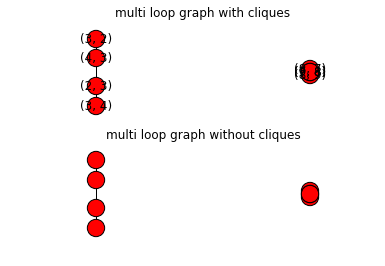

In [95]:
tinyLoop = np.array([[1, 1, 1],
                     [1, 0, 1],
                     [1, 1, 1]], dtype=bool)
multiLoop = np.zeros((25, 25), dtype=bool)
multiLoop[2:5, 2:5] = tinyLoop
multiLoop[7:10, 7:10] = tinyLoop
multiloopgraph = getNetworkxGraphFromarray(multiLoop, False)
plt.subplot(2, 1, 1)
plt.title("multi loop graph with cliques")
nx.draw_spectral(multiloopgraph, with_labels=True)
multiloopgraph=removeCliqueEdges(multiloopgraph)
plt.subplot(2,1,2)
plt.title("multi loop graph without cliques")
nx.draw_spectral(multiloopgraph)

In [96]:
dlinecount, dlinelength, segmentTortuosityline, totalSegmentsLine  = getBifurcatedSegmentsAndLengths(lineGraph, True, False)
assert totalSegmentsLine == 0
dcyclecount, dcyclelength, segmentTortuositycycle, totalSegmentsDonut  = getBifurcatedSegmentsAndLengths(donutGraph, True, False)
assert totalSegmentsDonut == 1
ddisjointCyclescount, ddisjointCyleslength, segmentTortuositycycles, totalSegmentsDisjointCycles  = getBifurcatedSegmentsAndLengths(multiLoop, False, True)
assert totalSegmentsDisjointCycles == 2
dTreecount, dTreelength, segmentTortuositytree, totalSegmentsTree  = getBifurcatedSegmentsAndLengths(crosGraph, True, False)
assert totalSegmentsTree == 1
dTreescount, dTreeslength, segmentTortuositytrees, totalSegmentsTrees  = getBifurcatedSegmentsAndLengths(crosPairgraph, True, False)
assert totalSegmentsTrees == 2
dcycleTreecount, dcycleTreelength, segmentTortuositycycletree, totalSegmentsSampleGraph = getBifurcatedSegmentsAndLengths(sampleGraph, True, False)
assert totalSegmentsSampleGraph == 1
dcyclesTouchcount, dcyclesTouchlength, segmentTortuositycyclesTouch, totalSegmentsCyclestouch  = getBifurcatedSegmentsAndLengths(loopGraph, True, False)
assert totalSegmentsCyclestouch == 1

time taken to calculate segments and their lengths is 0.000 seconds
time taken to calculate segments and their lengths is 0.001 seconds
there are no crowded joint points in the image
time taken to obtain networkxGraph is 0.002 seconds
number of graphs in the input networkxGraph is 2
time taken to calculate segments and their lengths is 0.000 seconds
time taken to calculate segments and their lengths is 0.000 seconds
time taken to calculate segments and their lengths is 0.001 seconds
time taken to calculate segments and their lengths is 0.001 seconds
time taken to calculate segments and their lengths is 0.001 seconds
